In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
df = pd.read_csv('covid19-cdc-16440004.csv')

In [6]:
# Change 'Missing' to 'Unknown'
df.loc[((df['sex'] == 'Missing') | (df['sex'] == 'Other')), 'sex'] = 'Unknown'
df.loc[(df['race_ethnicity_combined'] == 'Missing'), 'race_ethnicity_combined'] = 'Unknown'
df.loc[((df['hosp_yn'] == 'Missing') | (df['hosp_yn'] == 'OTH')), 'hosp_yn'] = 'Unknown'
df.loc[(df['icu_yn'] == 'Missing'), 'icu_yn'] = 'Unknown'
df.loc[(df['medcond_yn'] == 'Missing'), 'medcond_yn'] = 'Unknown'

In [7]:
# Change datatypes
df = df.astype({"age_group": "category",
                "current_status": 'category', 
                "sex": 'category', 
                "race_ethnicity_combined": 'category',
                "hosp_yn": 'category', 
                "icu_yn": 'category', 
                "death_yn": 'category', 
                "medcond_yn": 'category'
               })

In [8]:
# Split df into train and test
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)
# total for death = yes/no in train set
death_count_yes = train.loc[train['death_yn'] == "Yes"].shape[0]
death_count_no = train.loc[train['death_yn'] == "No"].shape[0]

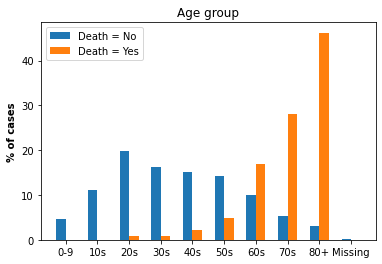

In [9]:
# % of each age_group with death = yes/no
width = 0.3
age_list = ["0 - 9 Years", "10 - 19 Years", "20 - 29 Years", "30 - 39 Years", "40 - 49 Years", 
            "50 - 59 Years", "60 - 69 Years", "70 - 79 Years", "80+ Years", "Missing"]
age_no = train.loc[train['death_yn'] == "No"]['age_group'].value_counts().reindex(age_list)*100/death_count_no
age_yes = train.loc[train['death_yn'] == "Yes"]['age_group'].value_counts().reindex(age_list)*100/death_count_yes
x_age1 = np.arange(len(age_no))
x_age2 = [x + width for x in x_age1]
plt.bar(x_age1, age_no, width=width, label='Death = No')
plt.bar(x_age2, age_yes, width=width, label='Death = Yes')
plt.title('Age group')
plt.xticks([r + width/2 for r in range(len(age_no))], ["0-9", "10s", "20s", "30s", "40s", "50s", "60s", "70s", "80+", "Missing"])
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

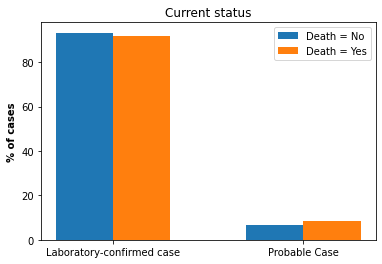

In [10]:
# % of each current_status with death = yes/no
width = 0.3
cur_st_no = train.loc[train['death_yn'] == "No"]['current_status'].value_counts()*100/death_count_no
cur_st_list = cur_st_no.index.tolist()
cur_st_yes = train.loc[train['death_yn'] == "Yes"]['current_status'].value_counts()*100/death_count_yes
x_cur_st1 = np.arange(len(cur_st_no))
x_cur_st2 = [x + width for x in x_cur_st1]
plt.bar(x_cur_st1, cur_st_no, width=width, label='Death = No')
plt.bar(x_cur_st2, cur_st_yes, width=width, label='Death = Yes')
plt.title('Current status')
plt.xticks([r + width/2 for r in range(len(cur_st_no))], cur_st_list)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

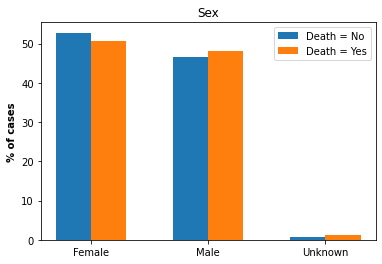

In [11]:
# % of each sex with death = yes/no
sex_no = train.loc[train['death_yn'] == "No"]['sex'].value_counts()*100/death_count_no
sex_list = sex_no.index.tolist()
sex_yes = train.loc[train['death_yn'] == "Yes"]['sex'].value_counts()*100/death_count_yes
x_sex1 = np.arange(len(sex_no))
x_sex2 = [x + width for x in x_sex1]
plt.bar(x_sex1, sex_no, width=width, label='Death = No')
plt.bar(x_sex2, sex_yes, width=width, label='Death = Yes')
plt.title('Sex')
plt.xticks([r + width/2 for r in range(len(sex_yes))], sex_list)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

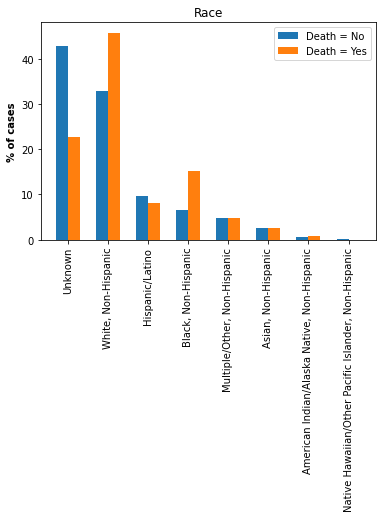

In [12]:
# % of each race with death = yes/no
race_no = train.loc[train['death_yn'] == "No"]['race_ethnicity_combined'].value_counts()*100/death_count_no
race_list = race_no.index.tolist()
race_yes = train.loc[train['death_yn'] == "Yes"]['race_ethnicity_combined'].value_counts().reindex(train.race_ethnicity_combined.unique(), fill_value=0)*100/death_count_yes
race_yes = race_yes.reindex(race_no.index.tolist())
x_race1 = np.arange(len(race_no))
x_race2 = [x + width for x in x_race1]
plt.bar(x_race1, race_no, width=width, label='Death = No')
plt.bar(x_race2, race_yes, width=width, label='Death = Yes')
plt.title('Race')
plt.xticks([r + width/2 for r in range(len(race_no))], race_list, rotation=90)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

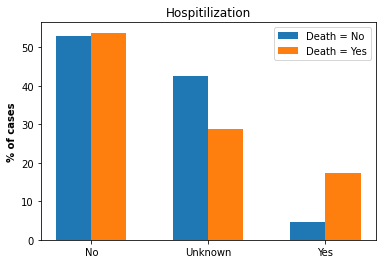

In [13]:
# % of each hosp_yn with death = yes/no
hosp_no = train.loc[train['death_yn'] == "No"]['hosp_yn'].value_counts()*100/death_count_no
hosp_list = hosp_no.index.tolist()
hosp_yes = train.loc[train['death_yn'] == "Yes"]['hosp_yn'].value_counts()*100/death_count_yes
x_hosp1 = np.arange(len(hosp_no))
x_hosp2 = [x + width for x in x_hosp1]
plt.bar(x_hosp1, hosp_no, width=width, label='Death = No')
plt.bar(x_hosp2, hosp_yes, width=width, label='Death = Yes')
plt.title('Hospitilization')
plt.xticks([r + width/2 for r in range(len(hosp_no))], hosp_list)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

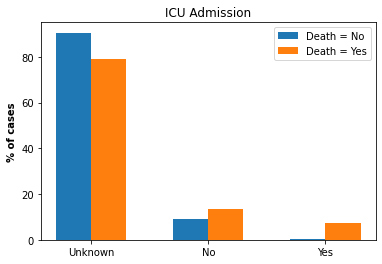

In [14]:
# % of each icu_yn with death = yes/no
icu_no = train.loc[train['death_yn'] == "No"]['icu_yn'].value_counts()*100/death_count_no
icu_list = icu_no.index.tolist()
icu_yes = train.loc[train['death_yn'] == "Yes"]['icu_yn'].value_counts()*100/death_count_yes
x_icu1 = np.arange(len(icu_no))
x_icu2 = [x + width for x in x_icu1]
plt.bar(x_icu1, icu_no, width=width, label='Death = No')
plt.bar(x_icu2, icu_yes, width=width, label='Death = Yes')
plt.title('ICU Admission')
plt.xticks([r + width/2 for r in range(len(icu_no))], icu_list)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

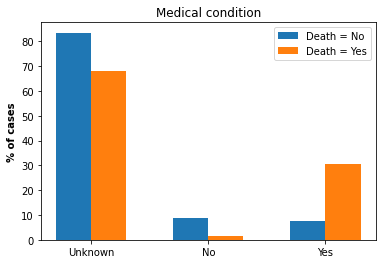

In [15]:
# % of each medcond_yn with death = yes/no
medcond_no = train.loc[train['death_yn'] == "No"]['medcond_yn'].value_counts()*100/death_count_no
medcond_list = medcond_no.index.tolist()
medcond_yes = train.loc[train['death_yn'] == "Yes"]['medcond_yn'].value_counts()*100/death_count_yes
medcond_yes = medcond_yes.reindex(medcond_no.index.tolist())
x_med1 = np.arange(len(medcond_no))
x_med2 = [x + width for x in x_med1]
plt.bar(x_med1, medcond_no, width=width, label='Death = No')
plt.bar(x_med2, medcond_yes, width=width, label='Death = Yes')
plt.title('Medical condition')
plt.xticks([r + width/2 for r in range(len(medcond_no))], medcond_list)
plt.ylabel('% of cases', fontweight='bold')
plt.legend()

<h3>(1.2)</h3>
The age graph clearly shows the risk of death greatly increases at 70-79 years, and then again at 80+ years. <br>
ICU admission and underlying medical condition also greatly ncrease the risk of death. <br>
The rest of the features don't seem to have any correlation with the target feature.

In [16]:
# Q.2
df_all = pd.get_dummies(df, drop_first=True)
# Features used = age, hosp_yn, icu_yn, medcond_yn
features =[]
for col in df_all.columns:
    if 'age' in col or 'hosp' in col or 'icu' in col or 'medcond' in col:
        features.append(col)

X = df_all[features]
y = df_all.death_yn_Yes
# Split into train and test dataframes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [17]:
model_lin = LinearRegression().fit(X_train, y_train)
print("Intercept: ", model_lin.intercept_)
print("Features and coeficients:")
for f in list(zip(features, model_lin.coef_)):
    print('{:80} {}'.format(f[0], f[1]))

Intercept:  -0.033168108585544226
Features and coeficients:
age_group_10 - 19 Years                                                          0.0020931623257419716
age_group_20 - 29 Years                                                          -0.00019157072878245307
age_group_30 - 39 Years                                                          -0.0017318123194586983
age_group_40 - 49 Years                                                          -0.0010067473036988496
age_group_50 - 59 Years                                                          -0.0004337322407279645
age_group_60 - 69 Years                                                          0.02862622344888391
age_group_70 - 79 Years                                                          0.1051080513301935
age_group_80+ Years                                                              0.2748760731942081
age_group_Missing                                                                0.004557859801515265
hosp_yn_Unknown  

<h3>(2.2)</h3>
The target feature, death_yn, is 0 for "No" and 1 for "Yes", so a higher feature coefficient means higher correlation with death. <br>
The age coefficients below 70 years are very small, and then drastically increase after 70 years. <br>
Only four coefficients are greater than 0.1, age = 70-79, 80+, hosp_yn = Yes and icu_yn = Yes. All other coefficients are very small.

In [18]:
y_lin = model_lin.predict(X_test)
lin_pred = pd.concat([y_test, pd.DataFrame(y_lin, columns=['Predicted'], index=X_test.index)], axis=1)
lin_pred.head(10)

,death_yn_Yes,Predicted
6252,0,0.004720
4684,0,0.002193
1731,0,-0.006186
4742,0,0.000895
4521,0,-0.006429
6340,0,-0.007727
576,0,-0.007002
5202,0,-0.007002
6363,0,0.000895
439,0,0.039661


In [19]:
print('Real    Predicted')
for row in lin_pred.head(10).iterrows():
    if row[1][0] == 1:
        real = 'Yes'
    else:
        real = 'No'
    if row[1][1] > 0.5:
        pred = 'Yes'
    else:
        pred = 'No'
    print('{:7} {:7}'.format(real, pred))

Real    Predicted
No      No     
No      No     
No      No     
No      No     
No      No     
No      No     
No      No     
No      No     
No      No     
No      No     


In [20]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print('\n==============================================================================')
    print("MAE: ", metrics.mean_absolute_error(testActualVal, predictions))
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    
printMetrics(y_test, y_lin)


MAE:  0.05552660521037998
RMSE:  0.15592320275744073
R2:  0.2801763091594974


In [21]:
scores1 = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores1)
print("Avg MAE score over 5 folds:", np.mean(scores1))
print("Stddev MAE score over 5 folds:", np.std(scores1))

[0.05433265 0.05097757 0.05225658 0.05686812 0.05758079]
Avg MAE score over 5 folds: 0.05440314166820308
Stddev MAE score over 5 folds: 0.0025503245160784296


In [22]:
eval_measures = ['neg_mean_absolute_error', 'neg_mean_squared_error', 'r2']
scores = cross_validate(LinearRegression(), X, y, scoring=eval_measures, cv=5)
scores

{'fit_time': array([0.006989  , 0.00600338, 0.00598359, 0.00600338, 0.00500059]),
 'score_time': array([0.00299668, 0.00401545, 0.00199914, 0.00399876, 0.00300002]),
 'test_neg_mean_absolute_error': array([-0.05433265, -0.05097757, -0.05225658, -0.05686812, -0.05758079]),
 'test_neg_mean_squared_error': array([-0.02415612, -0.02107609, -0.02127924, -0.02550736, -0.02376025]),
 'test_r2': array([0.30393831, 0.25153289, 0.28037147, 0.20067199, 0.32437391])}

In [23]:
scores2 = -cross_val_score(LinearRegression(), X, y, scoring='neg_mean_squared_error', cv=5)
print(scores2)
rmse = scores2**0.5
print("Avg RMSE score over 5 folds:", np.mean(rmse))
print("Stddev RMSE score over 5 folds:", np.std(rmse))

[0.02415612 0.02107609 0.02127924 0.02550736 0.02376025]
Avg RMSE score over 5 folds: 0.152065264810585
Stddev RMSE score over 5 folds: 0.0056538102252612875


<h2>Q.3</h2>

In [24]:
model_log = LogisticRegression().fit(X_train, y_train)
print("Intercept: ", model_log.intercept_)
print("\nCoeficients:\n", model_log.coef_[0])

Intercept:  [-6.44655863]

Coeficients:
 [-1.38543673 -1.26476042 -1.1259293  -0.6411179  -0.0611981   1.33022457
  2.30660797  3.35137209 -0.03758141  0.65023838  2.17377311  0.73193135
  2.45684471  0.46730343  1.46389967]


In [25]:
y_log = model_log.predict(X_test)
log_pred = pd.concat([y_test, pd.DataFrame(y_log, columns=['Predicted'], index=X_test.index)], axis=1)
log_pred.head(10)

,death_yn_Yes,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,0,0
6363,0,0
439,0,0


In [46]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_log))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_log))
print("Classification report:\n ", metrics.classification_report(y_test, y_log))

Accuracy:  0.9683333333333334
Confusion matrix: 
 [[2874   21]
 [  74   31]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      0.99      0.98      2895
           1       0.60      0.30      0.39       105

    accuracy                           0.97      3000
   macro avg       0.79      0.64      0.69      3000
weighted avg       0.96      0.97      0.96      3000



<h2>Q.4</h2>

In [27]:
# Train RF with 100 trees
rfc = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1)
rfc.fit(X_train, y_train)
pd.DataFrame({'feature': X_train.columns, 'importance':rfc.feature_importances_})

,feature,importance
0,age_group_10 - 19 Years,0.004984
1,age_group_20 - 29 Years,0.014218
2,age_group_30 - 39 Years,0.017676
3,age_group_40 - 49 Years,0.019693
4,age_group_50 - 59 Years,0.016503
5,age_group_60 - 69 Years,0.017601
6,age_group_70 - 79 Years,0.067846
7,age_group_80+ Years,0.286282
8,age_group_Missing,0.000014
9,hosp_yn_Unknown,0.019046


In [28]:
y_rfc = rfc.predict(X_test)
rfc_pred = pd.concat([y_test, pd.DataFrame(y_rfc, columns=['Predicted'], index=X_test.index)], axis=1)
rfc_pred.head(10)

,death_yn_Yes,Predicted
6252,0,0
4684,0,0
1731,0,0
4742,0,0
4521,0,0
6340,0,0
576,0,0
5202,0,0
6363,0,0
439,0,0


In [29]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_rfc))
print("Confusion matrix: \n", metrics.confusion_matrix(y_test, y_rfc))
print("Classification report:\n ", metrics.classification_report(y_test, y_rfc))

Accuracy:  0.9663333333333334
Confusion matrix: 
 [[2884   11]
 [  90   15]]
Classification report:
                precision    recall  f1-score   support

           0       0.97      1.00      0.98      2895
           1       0.58      0.14      0.23       105

    accuracy                           0.97      3000
   macro avg       0.77      0.57      0.61      3000
weighted avg       0.96      0.97      0.96      3000



In [30]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), X_test, y_test, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[0.971 0.968 0.963]
0.9673333333333334


In [31]:
rfc.oob_score_

0.97

<h2>Q.5</h2>

In [32]:
df = pd.read_csv('24032021-covid19-cdc-deathyn-recent-10k.csv')

In [33]:
# Change 'Missing' to 'Unknown'
df.loc[(df['sex'] == 'Missing') | (df['sex'] == 'Other'), 'sex'] = 'Unknown'
df.loc[(df['race_ethnicity_combined'] == 'Missing'), 'race_ethnicity_combined'] = 'Unknown'
df.loc[(df['hosp_yn'] == 'Missing') | (df['hosp_yn'] == 'OTH'), 'hosp_yn'] = 'Unknown'
df.loc[(df['icu_yn'] == 'Missing'), 'icu_yn'] = 'Unknown'
df.loc[(df['medcond_yn'] == 'Missing'), 'medcond_yn'] = 'Unknown'

In [34]:
# Change datatypes
df = df.astype({"age_group": "category",
                "current_status": 'category', 
                "sex": 'category', 
                "race_ethnicity_combined": 'category',
                "hosp_yn": 'category', 
                "icu_yn": 'category', 
                "death_yn": 'category', 
                "medcond_yn": 'category'
               })

In [35]:
df_all = pd.get_dummies(df, drop_first=True)
X = df_all[features]
y = df_all.death_yn_Yes

In [36]:
y_rfc = rfc.predict(X)
rfc_pred = pd.concat([y, pd.DataFrame(y_rfc, columns=['Predicted'], index=X.index)], axis=1)
rfc_pred.head(10)

,death_yn_Yes,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [37]:
print("Accuracy: ", metrics.accuracy_score(y, y_rfc))
print("Confusion matrix: \n", metrics.confusion_matrix(y, y_rfc))
print("Classification report:\n ", metrics.classification_report(y, y_rfc))

Accuracy:  0.9869
Confusion matrix: 
 [[9861   18]
 [ 113    8]]
Classification report:
                precision    recall  f1-score   support

           0       0.99      1.00      0.99      9879
           1       0.31      0.07      0.11       121

    accuracy                           0.99     10000
   macro avg       0.65      0.53      0.55     10000
weighted avg       0.98      0.99      0.98     10000



In [38]:
scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1), X_test, y_test, scoring='accuracy', cv=3)
print(scores)
print(scores.mean())

[0.971 0.968 0.963]
0.9673333333333334


In [39]:
rfc.oob_score_

0.97

A basic model that predicts 'No' for all cases would be around 98.8% accurate. My model predicted 8 out of 121 'Yes' cases correctly, which is only slightly better than the basic model.It also had 18 false positives, which caused it's accuracy to be slightly lower than the basic model at 98.7%.